العمر : قيم صحيحة تمثل عمر المريض، تتراوح من 20 إلى 80.

الجنس : القيم الثنائية التي تمثل الجنس، حيث يشير 0 إلى الذكر ويشير 1 إلى الأنثى.

مؤشر كتلة الجسم : القيم المستمرة التي تمثل مؤشر كتلة الجسم، تتراوح من 15 إلى 40.

التدخين : القيم الثنائية التي تشير إلى حالة التدخين، حيث 0 يعني لا و 1 يعني نعم.

GeneticRisk : القيم الفئوية التي تمثل مستويات الخطر الجيني للإصابة بالسرطان، حيث يشير 0 إلى مستوى منخفض، و1 إلى مستوى متوسط، و2 إلى مستوى مرتفع.

النشاط البدني : قيم مستمرة تمثل عدد الساعات التي يتم قضاؤها في الأنشطة البدنية في الأسبوع، وتتراوح من 0 إلى 10.

تناول الكحول : قيم مستمرة تمثل عدد وحدات الكحول المستهلكة أسبوعيًا، وتتراوح من 0 إلى 5.

CancerHistory : قيم ثنائية تشير إلى ما إذا كان المريض لديه تاريخ شخصي للإصابة بالسرطان، حيث يعني 0 لا ويعني 1 نعم.

التشخيص : القيم الثنائية التي تشير إلى حالة تشخيص السرطان، حيث يشير 0 إلى عدم وجود سرطان ويشير 1 إلى السرطان.

المتغير المستهدف
التشخيص : المتغير الرئيسي للتنبؤ، والذي يشير إلى ما إذا كان المريض مصابًا بالسرطان.

In [2]:
import pandas as pd 

aplowad the dataset 

In [3]:
cancer_dataset = pd.read_csv('The_Cancer_data_1500_V2.csv')

In [4]:
cancer_dataset

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [5]:
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


Dealing with Missing data

In [6]:
cancer_dataset.isna().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [7]:
import seaborn as sns

<Axes: >

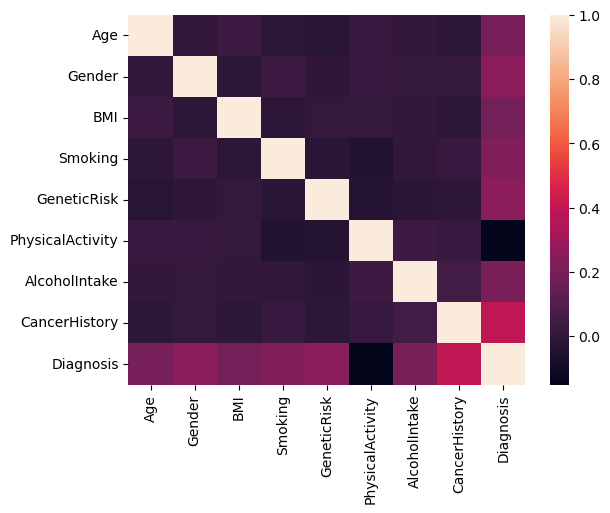

In [33]:
sns.heatmap(cancer_dataset.corr())

Exploratory Data Analysis

<Axes: xlabel='Diagnosis', ylabel='count'>

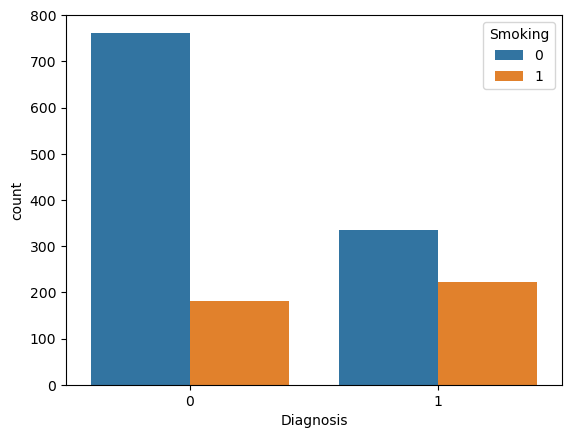

In [9]:
sns.countplot(x='Diagnosis' , data= cancer_dataset, hue='Smoking'  )

<Axes: xlabel='Diagnosis', ylabel='count'>

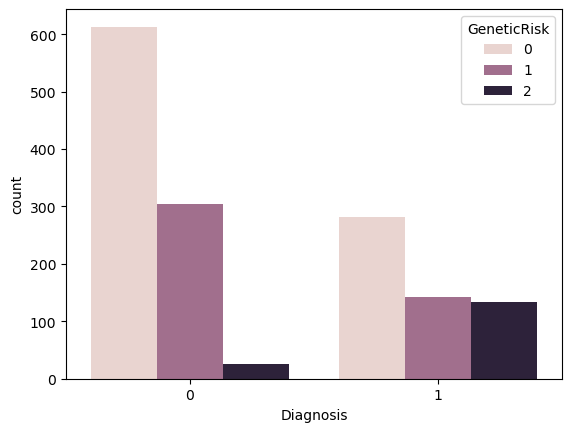

In [10]:
sns.countplot(x='Diagnosis' , data= cancer_dataset, hue='GeneticRisk'  )

<Axes: xlabel='Diagnosis', ylabel='count'>

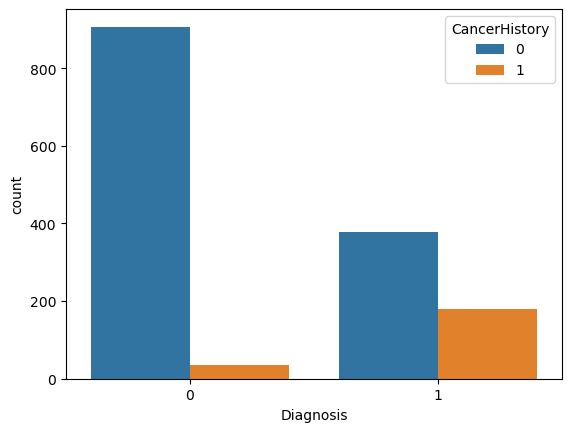

In [11]:
sns.countplot(x='Diagnosis' , data= cancer_dataset, hue='CancerHistory'  )

Building Our Model 

Train/Test Split Data

In [12]:
features = cancer_dataset.drop('Diagnosis' ,axis=1)
targit = cancer_dataset['Diagnosis']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train , X_test , y_train , y_test = train_test_split(features,targit , test_size=0.2 , random_state=42 )

Model Training and Predicting

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier()

In [17]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
predict = model.predict(X_test)

In [19]:
predict 

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0], d

In [20]:
y_test.values

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0], d

Model Evaluation

In [21]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [22]:
confusion_matrix(y_test , predict)

array([[168,  16],
       [ 23,  93]], dtype=int64)

In [23]:
print (classification_report(y_test , predict)) 

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       184
           1       0.85      0.80      0.83       116

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.87      0.87       300



In [24]:
accuracy_score(y_test , predict)

0.87

In [25]:
qution_list = [
    ' Enter the age betuen 20 - 80 : ' , 
    'Enter the gender (Male = 0 , Female = 1) : ' , 
    'Enter the BMI value from 15 to 40 : ' ,
    'Enter the value 1 to smoking and 0 to nosmoking : ' , 
    'Enter the GeneticRisk (0 = low , 1 = Medium , 3 = High) : ' , 
    'Enter the PhysicalActivity (number of hours per week : rang from 0 to 10 ) : ' ,
    'Enter the AlcoholIntake (number of alcohol units consumed per week : rang from 0 to 5 ) : ' ,
    'Enter the CancerHistory (has a history of the cancer enter 1 and No enter 0 ) : ' 
]

In [26]:
anser_list = [] 

In [27]:
for quition in qution_list : 
    anser = input(quition) 
    anser_list.append(anser) 

 Enter the age betuen 20 - 80 :  70
Enter the gender (Male = 0 , Female = 1) :  0
Enter the BMI value from 15 to 40 :  20
Enter the value 1 to smoking and 0 to nosmoking :  1
Enter the GeneticRisk (0 = low , 1 = Medium , 3 = High) :  0
Enter the PhysicalActivity (number of hours per week : rang from 0 to 10 ) :  8
Enter the AlcoholIntake (number of alcohol units consumed per week : rang from 0 to 5 ) :  0
Enter the CancerHistory (has a history of the cancer enter 1 and No enter 0 ) :  0


In [28]:
anser_list 

['70', '0', '20', '1', '0', '8', '0', '0']

In [29]:
data = pd.DataFrame([anser_list] , columns=features.columns)

In [30]:
data

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
0,70,0,20,1,0,8,0,0


In [31]:
predict = model.predict(data) 

In [32]:
if predict == 0  :
    print (" Not infected " ) 
elif predict == 1 : 
    print (" infected " )
else : 
    print (" There was an error in the data entry ????? " )  

 Not infected 
